In [1]:
import nbsetup
import math
import numpy as np
import seaborn as sns
import pandas as pd
import itertools
import ensemblepy as ep
from ensemblepy.densityvar import spike
import scipy as sp
import matplotlib.pyplot as plt

In [15]:
def mixed(pp, dimensions=1, count=1000):
    p = int(count*(1-pp))
    
    if p == count: 
        return spike(dimensions, count, val=0.0)
    elif p == 0:
        return np.array([np.random.uniform(0,1,count) for _ in range(dimensions)])#ep.dimspace(0,1,count,dimensions,True).T
    else:
        s = spike(dimensions, p, val=0.5)
        u = [np.random.uniform(0,1,count-p) for _ in range(dimensions)]#ep.dimspace(0,1,count-p,dimensions,True).T
        return np.array([np.concatenate([s[d], u[d]]) for d in range(dimensions)])


def mixed2(pp, dimensions=1, count=5000):
#    return np.array([np.random.normal(0.5,0.1*pp,count) for _ in range(dimensions)])
    #return np.array([np.random.uniform(max(0.499-pp/2,0),min(0.501+pp/2, 1),count) for _ in range(dimensions)])
    return np.array([np.random.uniform(0,pp,count) for _ in range(dimensions)])


    
def mixed3(pp, dimensions=1):
    return spike(dimensions, 5000, val=pp)

def mixed4(a, b):
    return np.concatenate([spike(1, 5000, val=a), spike(1, 5000, val=b)]).flatten()

def mixed5(pp, dimensions=1):
    return np.random.normal(pp, 5000)

def mixed6(pp):
    data = []
    for d in np.random.exponential(pp,size=5000):
        if d < 1: data.append(d)
    data = np.array(data)
    return np.concatenate([data, 1-data]).flatten()

In [3]:
def density_compare(func):
    data = []
    for x in np.linspace(0,1,10):
        dist = func(x)
        data.append({
            'x': x,
            'dv': ep.density_variance(dist),
            'de': ep.density_variance(dist, 'entropy')
        })
    data = pd.DataFrame(data)
    sns.lineplot(data=data, x='x', y='dv', label='dv')
    sns.lineplot(data=data, x='x', y='de', label='de')

In [4]:
from ensemblepy.densityvar import minmax_variance, DEFAULT_PARAMS

In [5]:
minmax_variance(*DEFAULT_PARAMS[0], mode='entropy', count=1000)

(7.515342441951855, 5.901210359337699)

In [6]:
minmax_variance(*DEFAULT_PARAMS[0], mode='entropy', count=5000)

(7.514816170406206, 5.901210359337699)

In [17]:
ep.density_variance(spike(1, 5000, val=0.0), 'entropy')

0.0

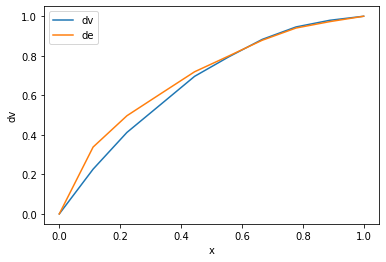

In [18]:
density_compare(mixed)

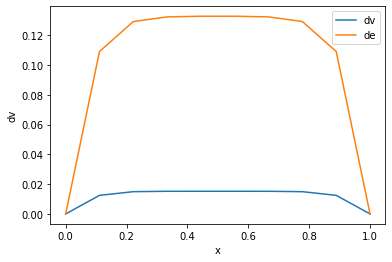

In [16]:
density_compare(mixed3)

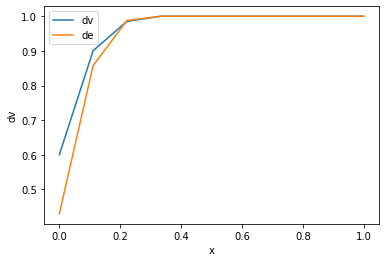

In [6]:
density_compare(mixed6)

In [237]:
def plot(dist):
    srange = (-8, 9)
    krange = list(range(1,50,2))
    data = []
    for k in krange:
        vs = ep.minmax_variance(k=k, var_range=srange)
        dv = ep.density_variance(dist, k=k, vs=vs, var_range=srange, bounded=False)
        for i, ds in enumerate(ep.densities(dist, k=k, var_range=srange)):
            data.append({'k': k, 'ds': ds, 'x': i, 'y': ds/vs[1], 'dv': dv})
    
    data = pd.DataFrame(data)
    fig, axes = plt.subplots(2, 2, figsize=(20, 10))
    sns.lineplot(data=data, x='x', y='y', hue='k', ax=axes[0][0])
    sns.lineplot(data=data, x='x', y='ds', hue='k', ax=axes[0][1])
    sns.histplot(dist, ax=axes[1][0]).set(xlim=(0,1))
    sns.lineplot(data=data, x='k', y='dv', ax=axes[1][1]).set(ylim=(0, max(data['dv'].max(), 1)))
    sns.lineplot(x=[krange[0], np.array(krange).max()], y=[1,1], ax=axes[1][1], color='lightgrey', linestyle='dotted')

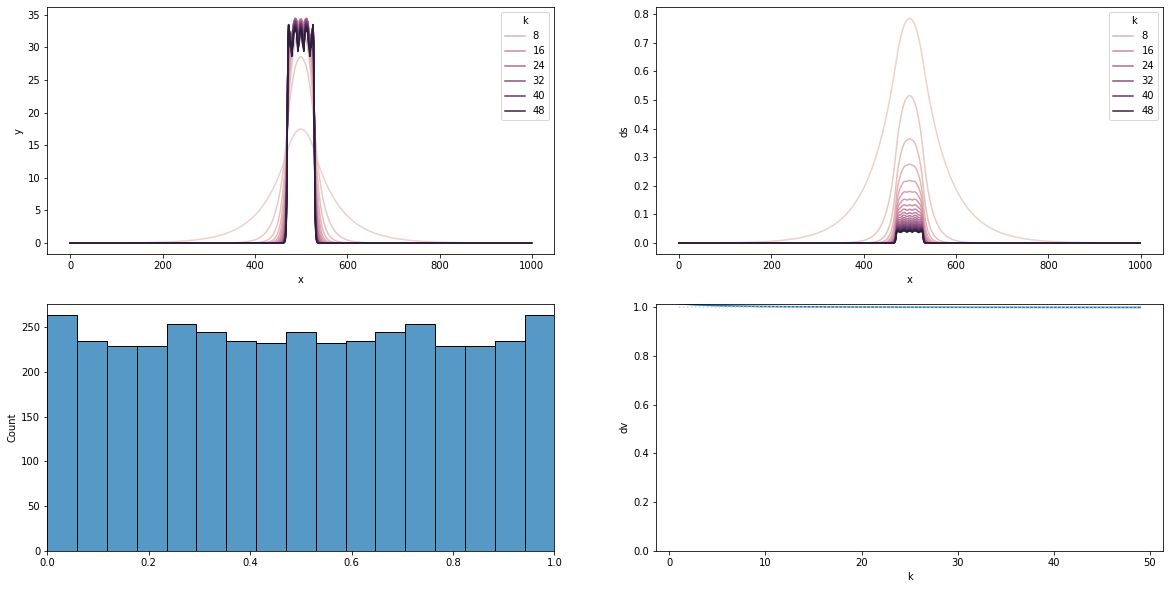

In [238]:
plot(mixed6(2))

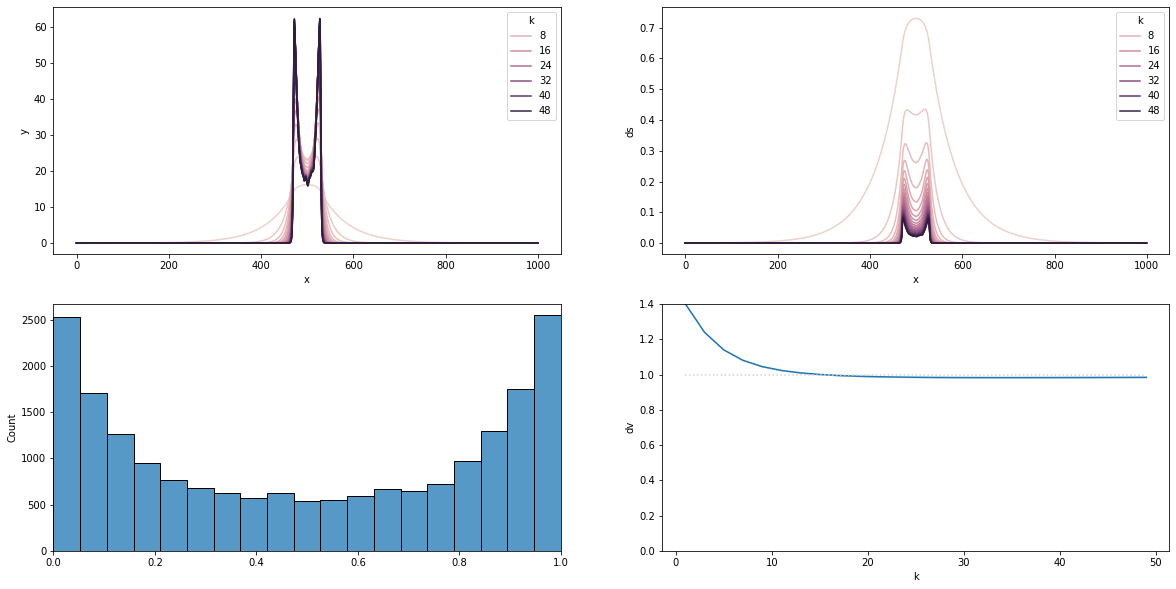

In [239]:
plot(np.concatenate([mixed2(1, count=10000).flatten(), mixed6(0.1).flatten()]).flatten())

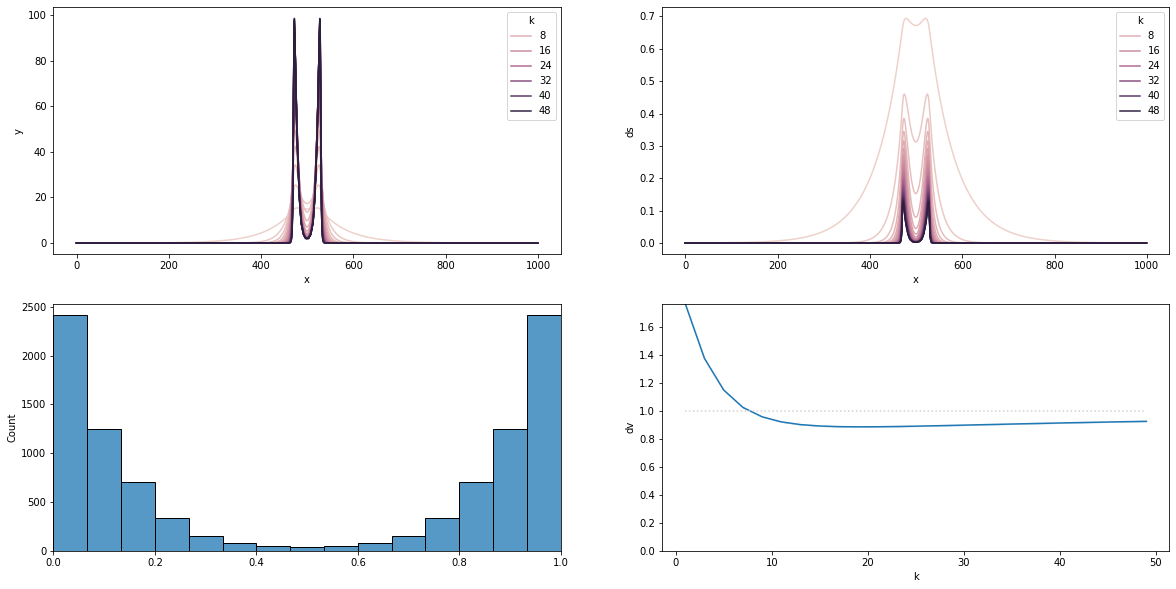

In [240]:
plot(mixed6(0.1))

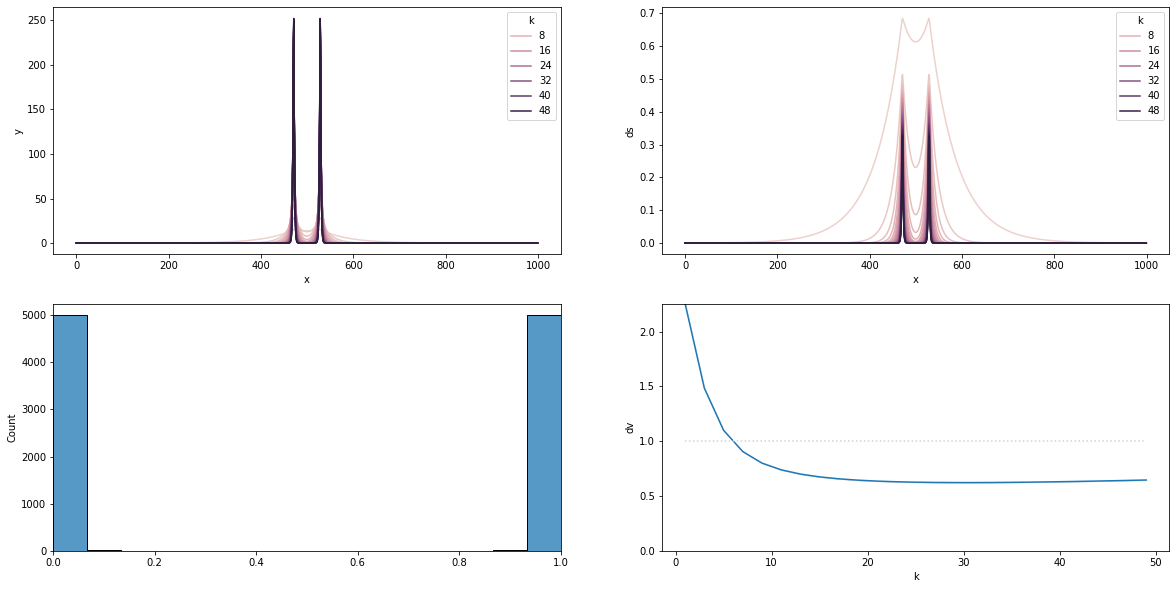

In [241]:
plot(mixed6(0.01))

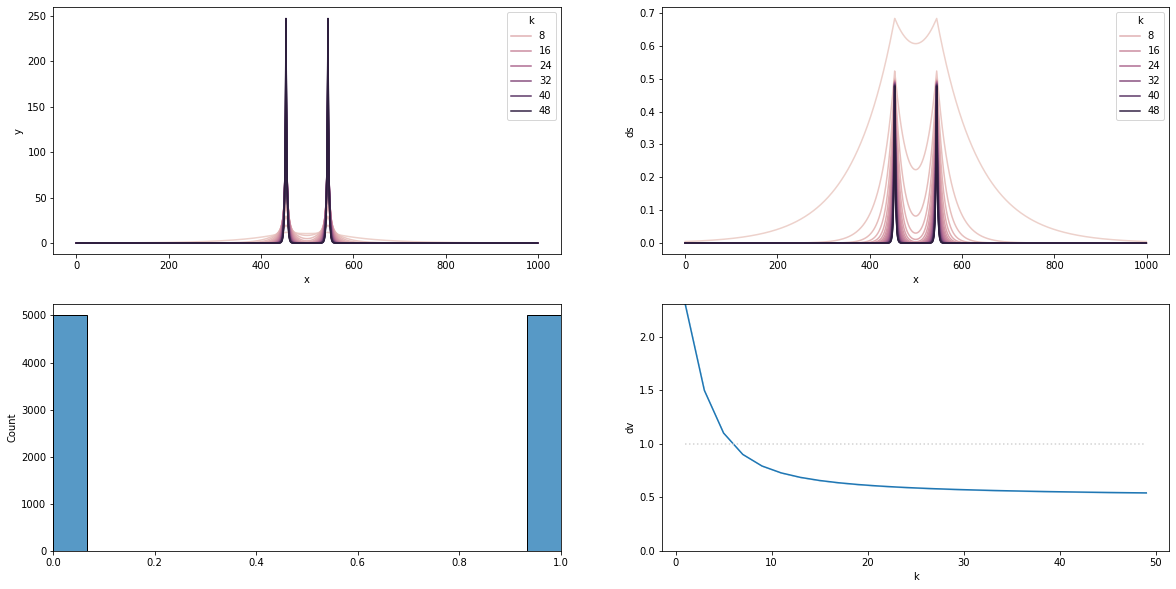

In [225]:
plot(mixed4(0, 1))

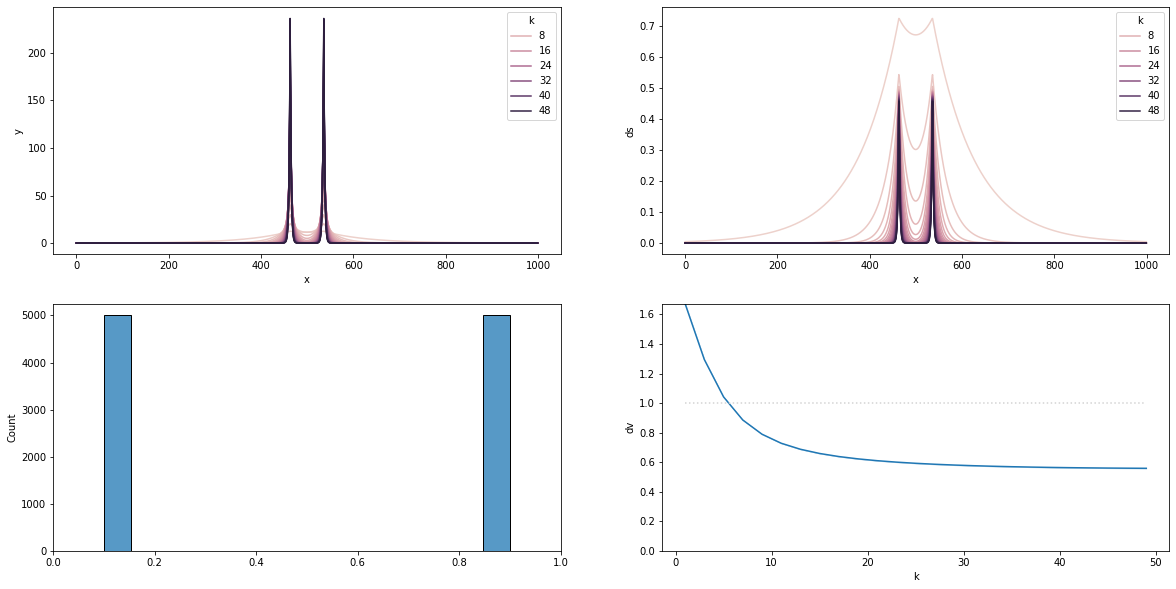

In [226]:
plot(mixed4(0.1, 0.9))

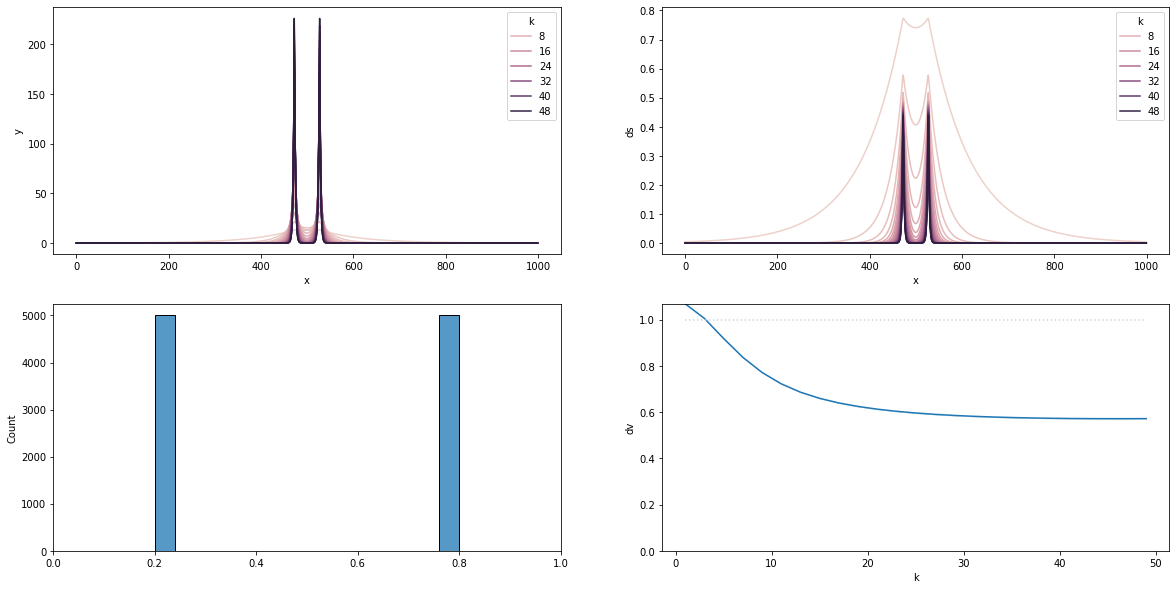

In [227]:
plot(mixed4(0.2, 0.8))

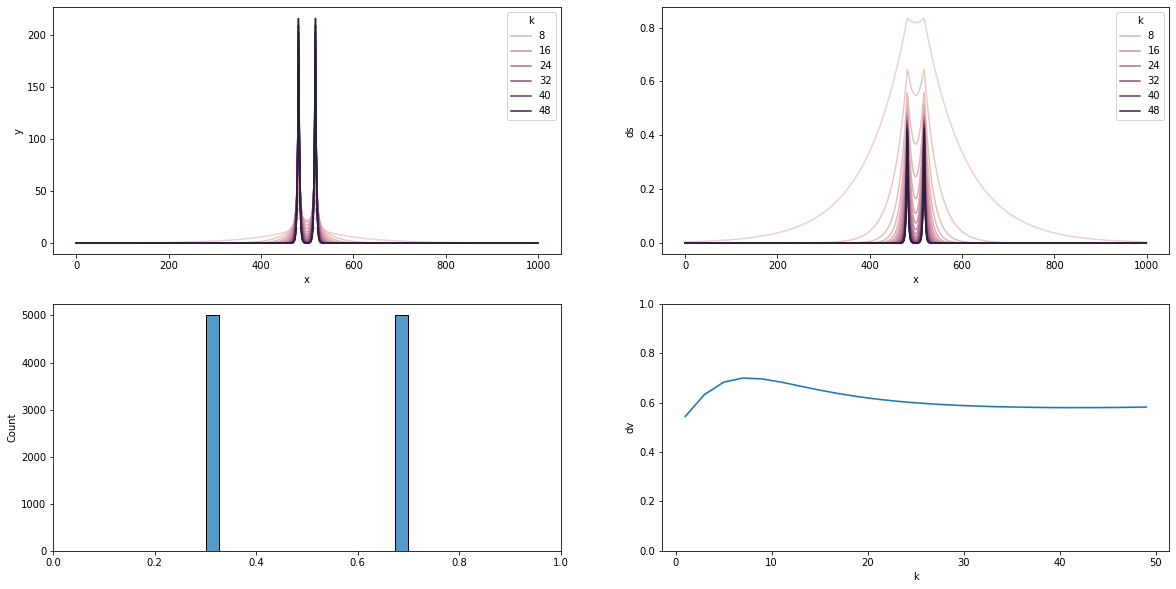

In [228]:
plot(mixed4(0.3, 0.7))

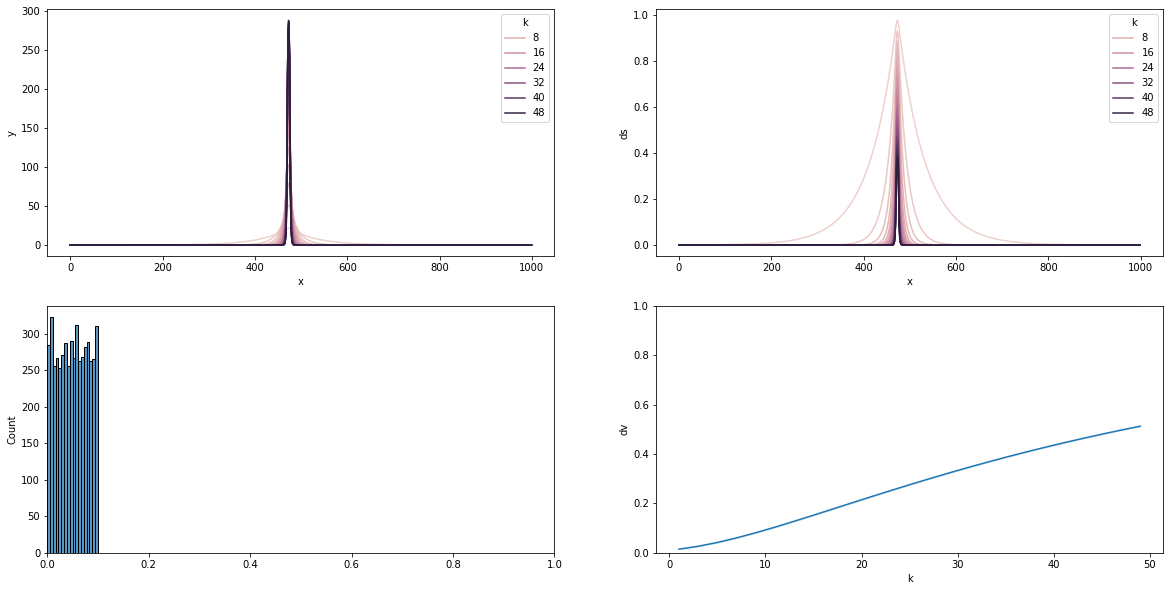

In [242]:
plot(mixed2(0.1, 1).flatten())

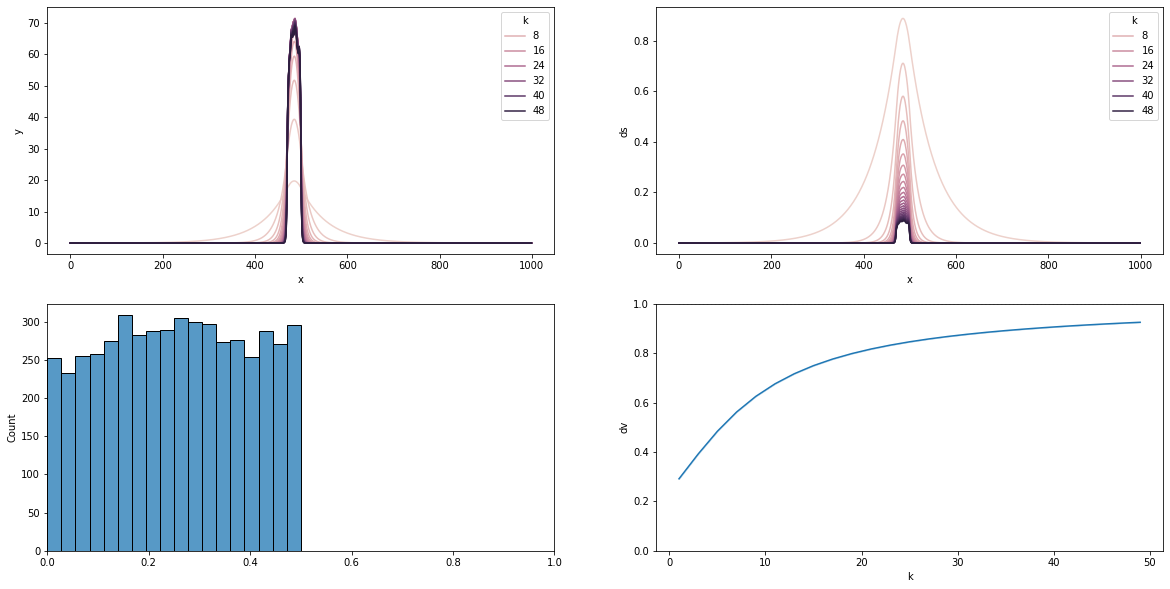

In [243]:
plot(mixed2(0.5, 1).flatten())

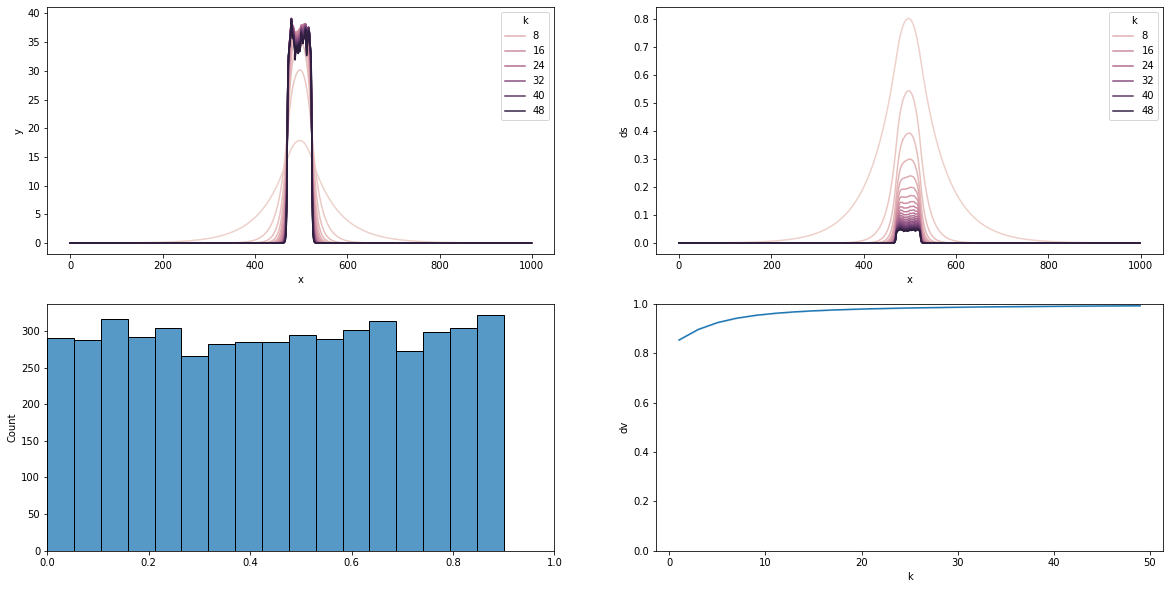

In [244]:
plot(mixed2(0.9, 1).flatten())

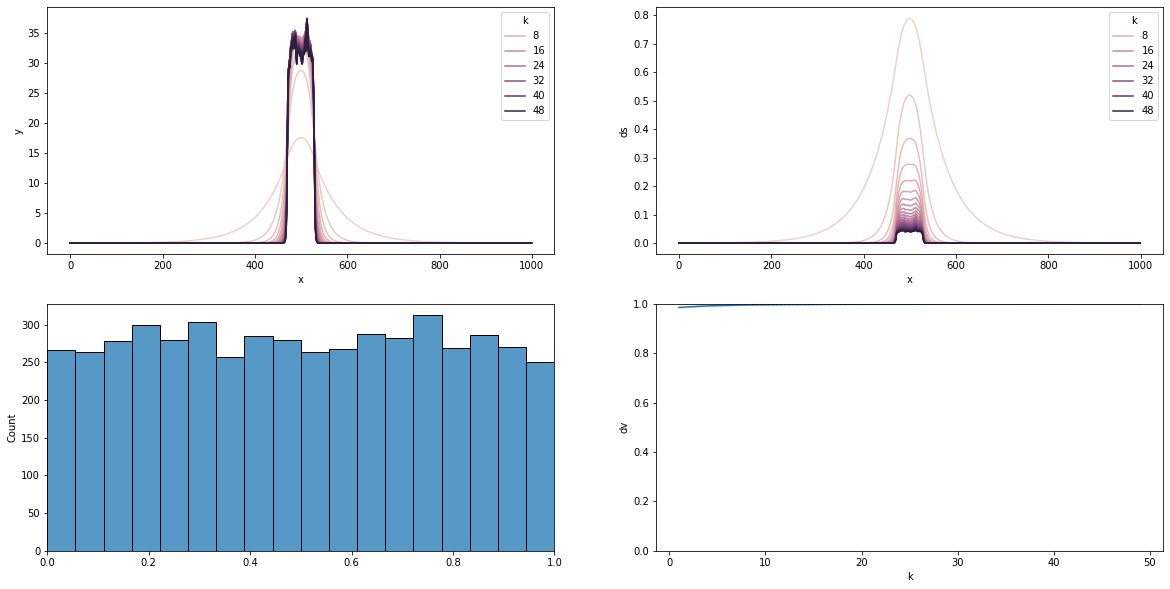

In [245]:
plot(mixed2(1, 1).flatten())

In [40]:
np.exp(-10)

4.5399929762484854e-05

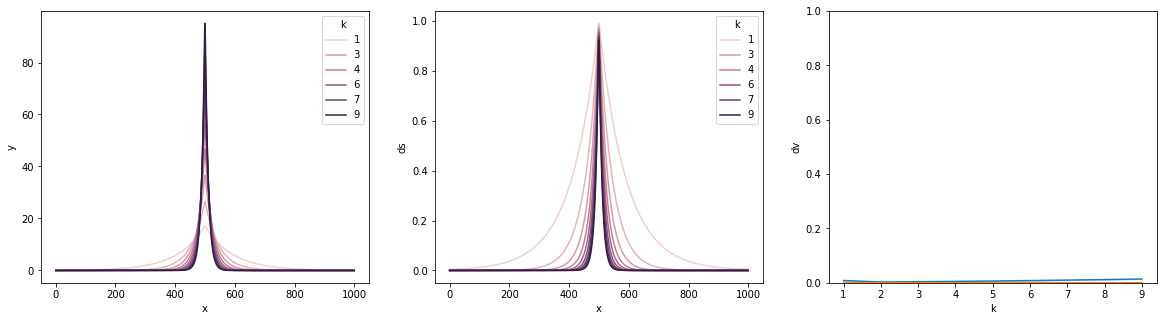

In [36]:
plot(mixed5(0.01, 1))

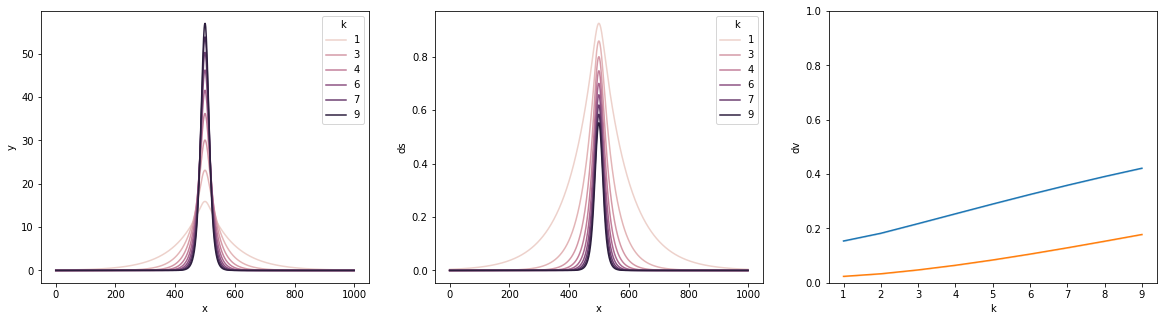

In [37]:
plot(mixed5(0.1, 1))

In [38]:
plot(mixed5(0.2, 1))

ValueError: Please make sure `data` (-0.3627222963477845, 1.3142573257549017) is within `normalise` (0, 1)

In [ ]:
percent = np.linspace(1,0,10)
dimensions = (1,)#range(1,9)
binrange = (3,)
krange = range(5,100,5)
srange = (-0.5,1.5)
#srange = (-5,5+1)
steps = 1000
data = []
for d in dimensions:
    for b in binrange:
        emax = None
        for k in krange:
            vs = ep.minmax_variance(d, k, steps=steps, var_range=srange)
            for x in percent:
                dist = mixed(x, d)
                pmf = np.histogramdd(dist.T, bins=b, range=[(0,1) for _ in range(d)])[0].flatten()
                ent = sp.stats.entropy(pmf)
                if emax is None: emax = ent
                nent = ent/emax
                dv = ep.density_variance(dist, bounded=False, k=k, vs=vs, steps=steps, var_range=srange)
                data.append({
                    'percent': x,
                    'dimension': d,
                    'dv': dv,
                    'dve': dv*np.log(d+1),
                    'nent': nent,
                    'ent': ent,
                    'bins': b,
                    'k': k,
                })
    print(d)

data = pd.DataFrame(data)

In [236]:
tuple([*[1,2,3], 4])

(1, 2, 3, 4)

<AxesSubplot:xlabel='percent', ylabel='dv'>

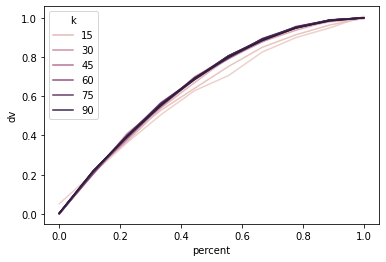

In [218]:
sns.lineplot(data=data,x='percent',y='dv',hue='k')

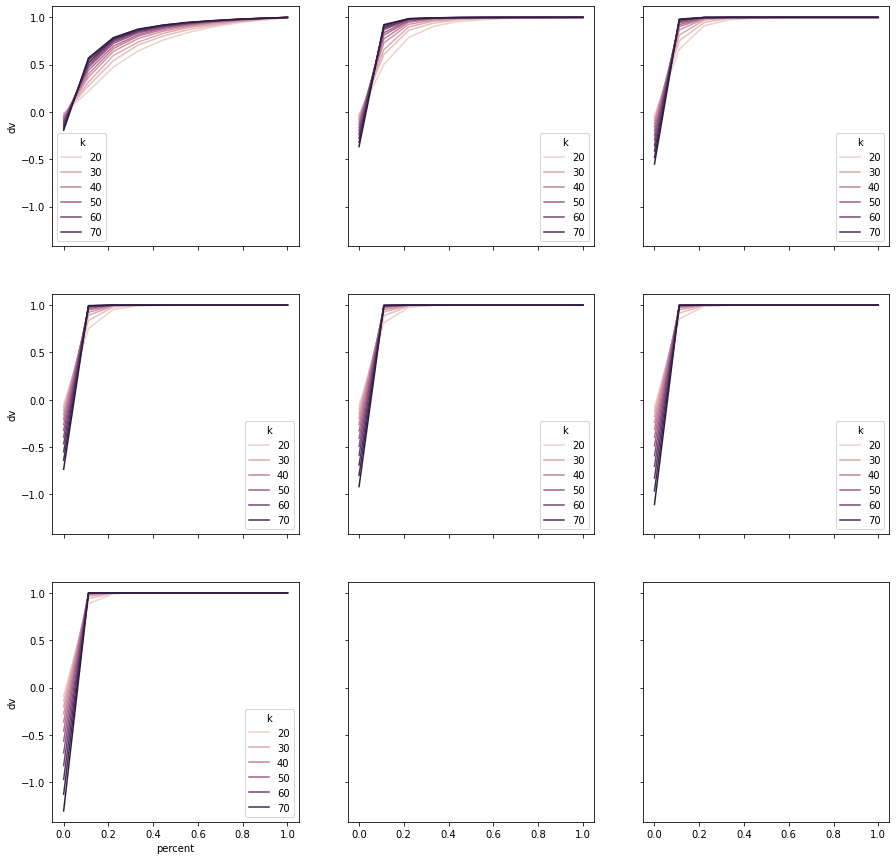

In [98]:
lines = 3
fig, axes = plt.subplots(lines, math.ceil((8/lines)), sharex=True, sharey=True, figsize=(15,5*lines))
axes = axes.flatten()
for d in range(1, 8):
    df = data[data['dimension']==d]
    sns.lineplot(data=df, x='percent', y='dv', hue='k', ax=axes[d-1])

[Text(0.5, 1.0, 'Discrete 5 bins per dimension')]

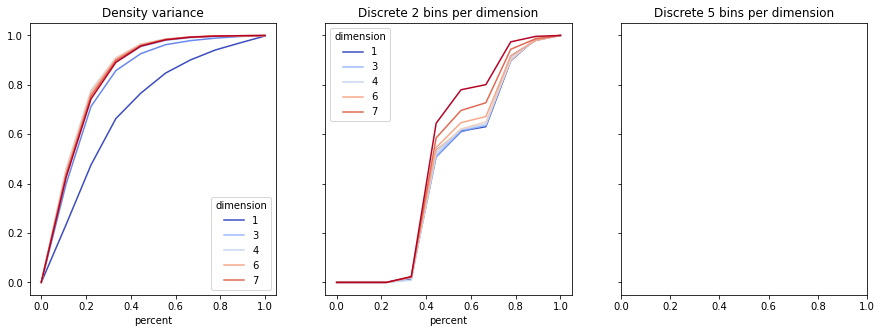

In [83]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,5))
sns.lineplot(data=data, x='percent', y='dv', hue='dimension', ax=axes[0], palette='coolwarm').set(ylabel=None, title='Density variance')
sns.lineplot(data=data[data['bins']==3], x='percent', y='nent', hue='dimension', ax=axes[1], palette='coolwarm').set(title='Discrete 2 bins per dimension')
sns.lineplot(data=data[data['bins']==5], x='percent', y='nent', hue='dimension', ax=axes[2], palette='coolwarm').set(title='Discrete 5 bins per dimension')

[Text(0.5, 1.0, 'Discrete 5 bins per dimension')]

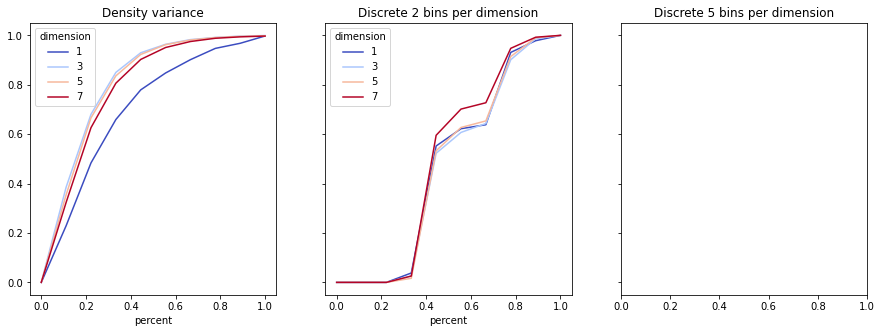

In [64]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=(15,5))
sns.lineplot(data=data, x='percent', y='dv', hue='dimension', ax=axes[0], palette='coolwarm').set(ylabel=None, title='Density variance')
sns.lineplot(data=data[data['bins']==3], x='percent', y='nent', hue='dimension', ax=axes[1], palette='coolwarm').set(title='Discrete 2 bins per dimension')
sns.lineplot(data=data[data['bins']==5], x='percent', y='nent', hue='dimension', ax=axes[2], palette='coolwarm').set(title='Discrete 5 bins per dimension')

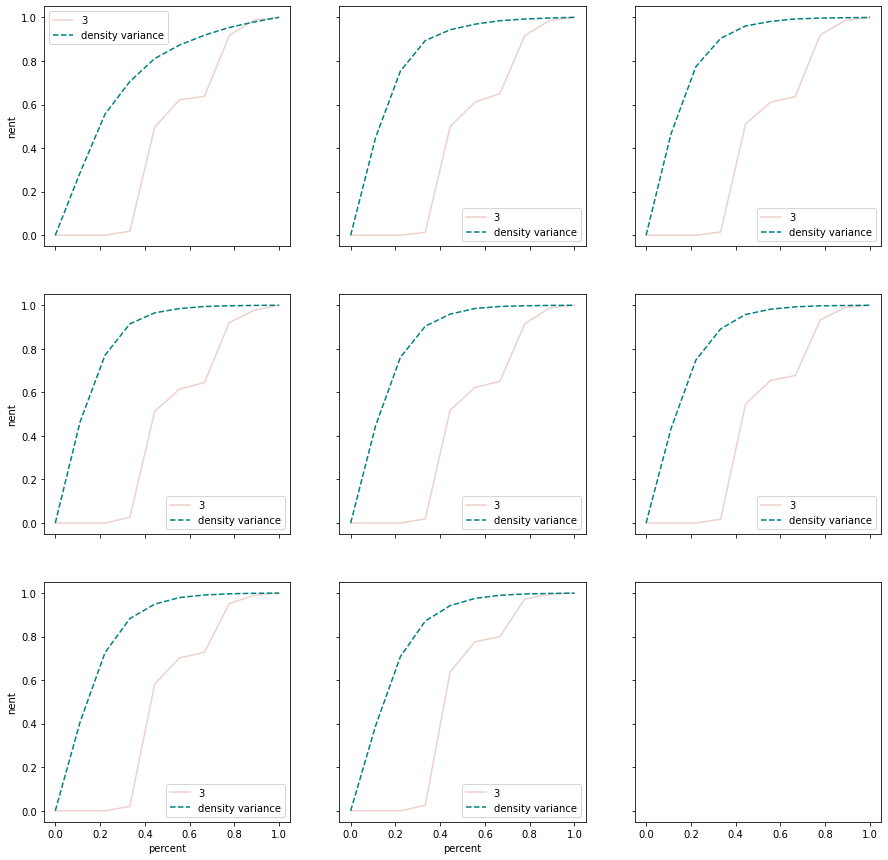

In [49]:
lines = 3
fig, axes = plt.subplots(lines, math.ceil((dimensions-1)/lines), sharex=True, sharey=True, figsize=(15,5*lines))
axes = axes.flatten()
for d in range(1, dimensions):
    df = data[data['dimension']==d]
    sns.lineplot(data=df, x='percent', y='nent', hue='bins', ax=axes[d-1])
    sns.lineplot(data=df, x='percent', y='dv', ax=axes[d-1], label='density variance', linestyle='dashed', color='teal')

[Text(0.5, 1.0, 'Discrete 5 bins per dimension')]

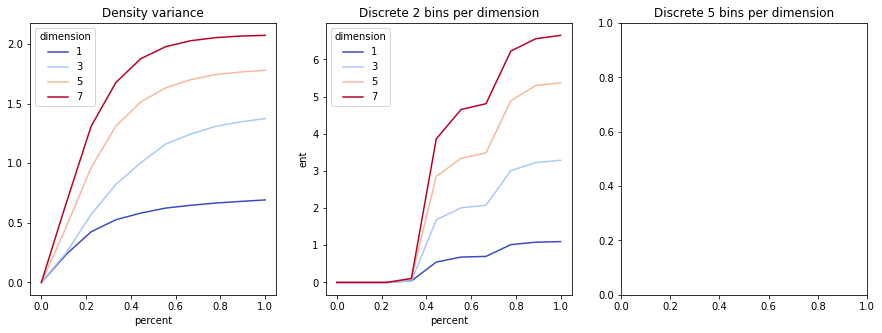

In [71]:
fig, axes = plt.subplots(1, 3, figsize=(15,5))
sns.lineplot(data=data, x='percent', y='dve', hue='dimension', ax=axes[0], palette='coolwarm').set(ylabel=None, title='Density variance')
sns.lineplot(data=data[data['bins']==3], x='percent', y='ent', hue='dimension', ax=axes[1], palette='coolwarm').set(title='Discrete 2 bins per dimension')
sns.lineplot(data=data[data['bins']==5], x='percent', y='ent', hue='dimension', ax=axes[2], palette='coolwarm').set(title='Discrete 5 bins per dimension')